## <center> Random Forests </center>
- Nous allons utiliser des ensembles qui combinent plusieurs modules d'apprentissage automatique dans un modèle plus puissant.
Le premier modèle à explorer est celui des forêts aléatoires.
Nous pouvons considérer une forêt aléatoire comme une collection d'arbres de décision.
<br/><br/>

- **Comment les forêts aléatoires sont-elles meilleures ou différentes des arbres de décision simples ?**

- Nous avons constaté que les arbres de décision ont tendance à surajuster une partie des données. La combinaison de plusieurs arbres permet de conserver leur puissance prédictive et peut réduire le surajustement en moyennant les résultats.

- Une caractéristique puissante et distincte des forêts aléatoires est l'application de la randomisation lors de la construction de chaque arbre. Le principal paramètre à spécifier est le nombre d'estimateurs, qui indique combien d'arbres créer.

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

1. Diviser les données.
2. Instancier le classifieur de forêt aléatoire avec les paramètres par défaut.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Building the classifier with 100 decision trees
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.972


* Une précision de *97*% sur les données de test avec les paramètres par défaut est plutôt bonne !
Nous pourrions obtenir des résultats potentiellement meilleurs en ajustant d'autres paramètres tels que :
* Le nombre maximal de caractéristiques, qui contrôle la randomisation de chaque arbre.
* L'élagage précoce, qui est similaire à ce qui est fait dans les arbres simples.

L'importance des caractéristiques est plus représentative que dans les arbres simples, elle offre une vision plus équilibrée des poids des caractéristiques.

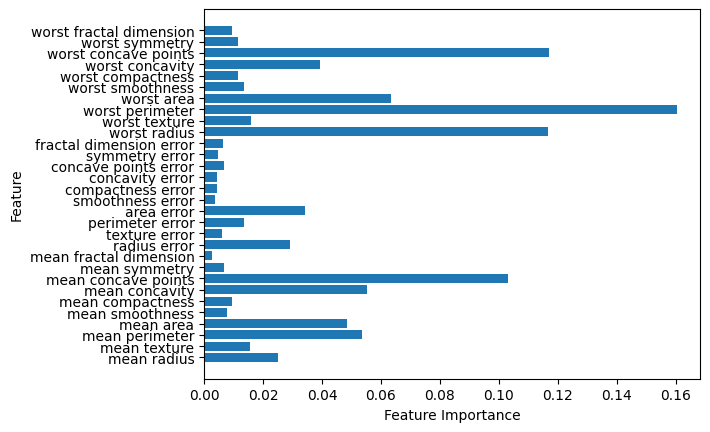

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- Dans les arbres simples, nous avons constaté que la caractéristique "worst radius" avait un poids significativement plus élevé par rapport aux autres caractéristiques, qui étaient de 30.

- Avec les forêts aléatoires, nous pouvons voir que de nombreuses autres caractéristiques ont une contribution non nulle, elles jouent un rôle plus important dans la prise de décision par rapport à l'arbre de décision unique. Les forêts aléatoires, dans notre cas, semblent offrir un choix plus éclairé.

### Avantages potentiels des forêts aléatoires

 - Puissants et largement utilisés.
 - Performent bien avec les paramètres par défaut.
 - Ne nécessitent pas de mise à l'échelle des données.
 - La randomisation les rend meilleurs que les arbres de décision simples.

### Paramètres à régler

 - n_jobs : Nombre de cœurs à utiliser pour l'entraînement (n_jobs=-1, pour tous les cœurs). Utiliser deux cœurs doublera la vitesse par rapport à l'utilisation d'un seul cœur.
 - n_estimators : Nombre d'arbres à utiliser. Plus il y en a, mieux c'est, cela réduit le surajustement, MAIS il faut prendre en compte le temps d'entraînement et l'allocation de mémoire. Plus il y a d'arbres, plus les ressources de l'ordinateur sont sollicitées.
 - max_depth, pour l'élagage précoce.
 - max_features, pour la randomisation. Les valeurs par défaut sont :
     - max_features = sqrt(n_features), pour la classification.
     - max_features = log2(n_features), pour la régression.
 - etc.

### Inconvénients potentiels des forêts aléatoires

- Performance moins bonne sur des données très dimensionnelles et éparses (données textuelles).
- Les grands ensembles de données nécessitent plus de ressources pour l'entraînement (temps, processeurs, etc.).
- Ne peuvent pas être visualisées aussi facilement qu'un seul arbre de décision.